In [35]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

In [36]:
df = pd.read_csv('exports-calendar-year.csv')
selected_countries = ['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia', 'Honduras']
df = df[df['exports'].isin(selected_countries)]

# Assegna a ogni paese un valore Y specifico per aumentare la distanza
country_y_positions = {
    'Brazil': 600,
    'Viet Nam': 500,
    'Colombia': 400,
    'Indonesia': 300,
    'Ethiopia': 200,
    'Honduras': 100
}
df['CountryIndex'] = df['exports'].map(country_y_positions)

# Prepara i dati per il grafico a bolle
df_long = df.melt(id_vars=['exports', 'CountryIndex'], var_name='Year', value_name='ExportVolume')
df_long['Year'] = df_long['Year'].astype(int)
df_long = df_long[df_long['Year'] <= 2013]

# Crea il grafico a bolle animato
fig = px.scatter(df_long, x='Year', y='CountryIndex', size='ExportVolume', color='ExportVolume',
                 hover_name='exports', animation_frame='Year',
                 size_max=60, range_x=[df_long['Year'].min(), df_long['Year'].max()])

# Aggiusta l'asse Y per mostrare i nomi dei paesi
fig.update_yaxes(tickvals=list(country_y_positions.values()), ticktext=list(country_y_positions.keys()))

# Mostra il grafico
fig.show()

In [39]:
df = pd.read_csv("disappearance.csv")
df.rename(columns={'disappearance': 'Countries', 'Volume': 'ImportVolume'}, inplace=True)

df_long = df.melt(id_vars='Countries', var_name='Year', value_name='ImportVolume')
df_long['Year'] = df_long['Year'].astype(int)

df_long = df_long.dropna(subset=['ImportVolume'])
df_long = df_long[df_long['Year'] <= 2013]

top5_per_year = df_long.groupby('Year').apply(lambda x: x.nlargest(5, 'ImportVolume')).reset_index(drop=True)

fig = px.bar(top5_per_year, x='ImportVolume', y='Countries', color='Countries',
             animation_frame='Year', range_x=[0, top5_per_year['ImportVolume'].max()],
             orientation='h')

fig.update_yaxes(title_text='Countries', title_standoff=25)

fig.update_layout(showlegend=False)

fig.show()
fig.write_html("second_graph.html")

In [40]:
df = pd.read_csv('exports-calendar-year.csv')

# Filtra il DataFrame per includere
# solo i paesi selezionati
selected_countries = ['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia', 'Honduras']
df.rename(columns={"exports":"Countries"}, inplace=True)
df = df[df['Countries'].isin(selected_countries)]

# Trasforma il DataFrame in formato lungo
df_long = df.melt(id_vars='Countries', var_name='Year', value_name='Export by Volume')
df_long['Year'] = df_long['Year'].astype(int)

# Filtra per includere solo i dati fino al 2013
df_long = df_long[df_long['Year'] <= 2013]

# Crea il grafico a barre animato
fig = px.bar(df_long, x='Countries', y='Export by Volume', color='Countries',
             animation_frame='Year', range_y=[0, df_long['Export by Volume'].max()])

fig.update_layout(showlegend=False)

# Mostra il grafico
fig.show()
fig.write_html("first_graph.html")

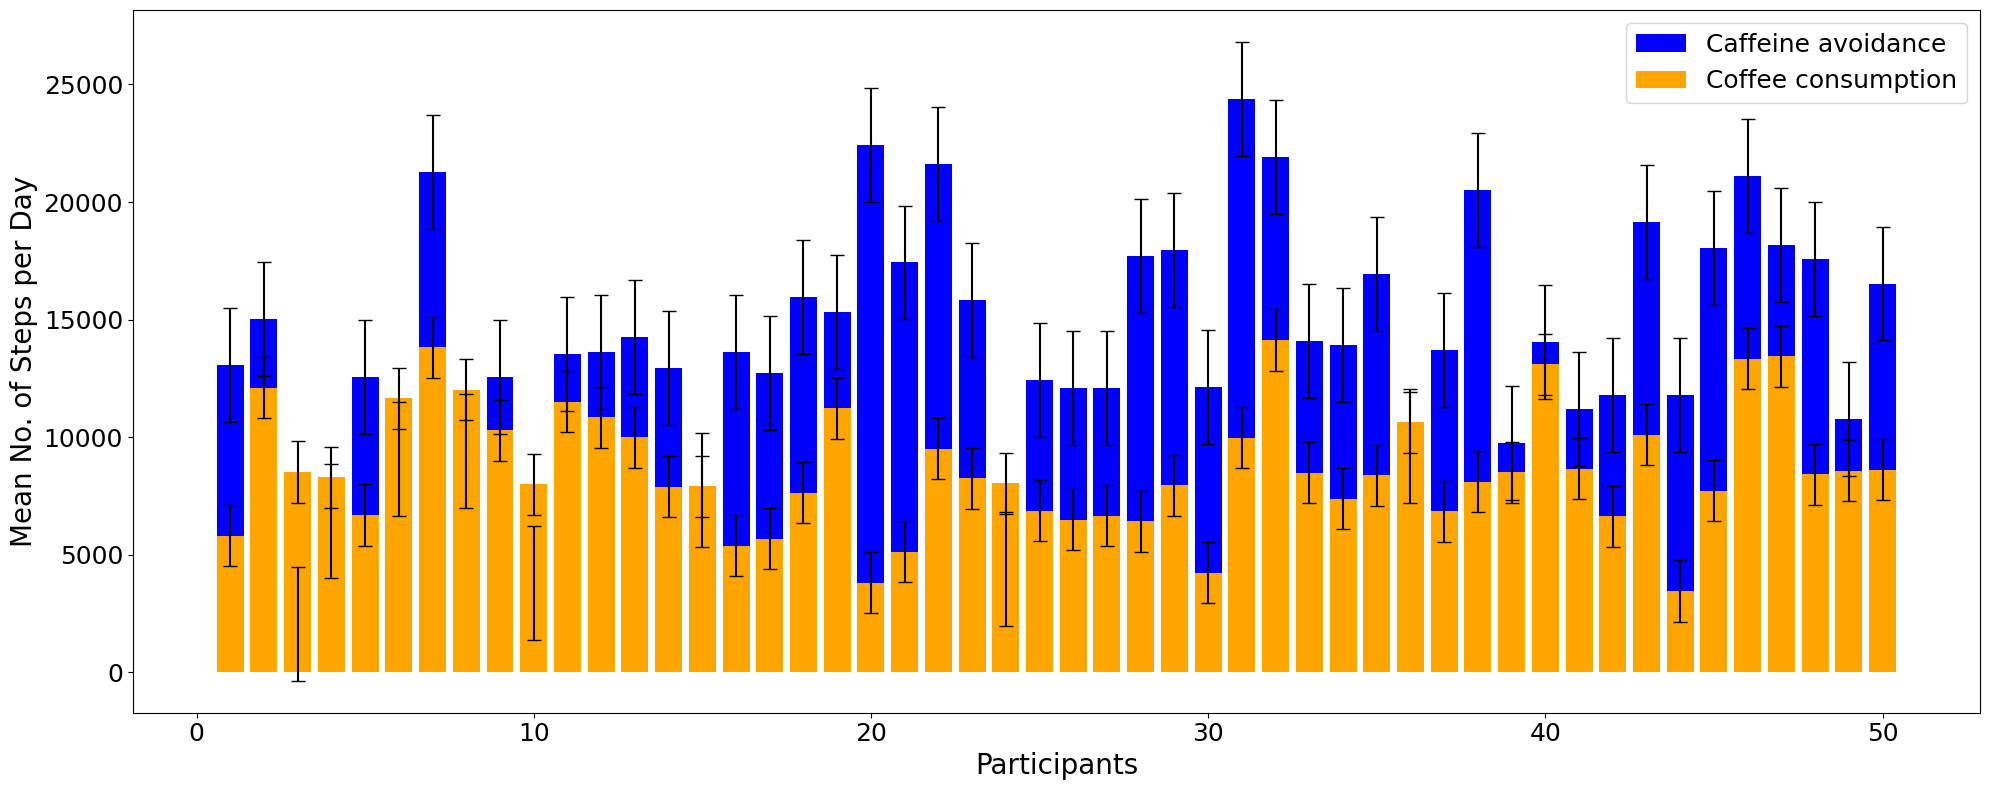

In [41]:
df_loaded = pd.read_csv("coffee_steps_dataset.csv")

plt.figure(figsize=(20, 8))

num_to_plot = 50

error_avoidance = df_loaded['Caffeine_Avoidance_Steps'][:num_to_plot].std() / 2
error_consumption = df_loaded['Coffee_Consumption_Steps'][:num_to_plot].std() / 2

plt.bar(df_loaded['Participant_ID'][:num_to_plot], df_loaded['Caffeine_Avoidance_Steps'][:num_to_plot],
        yerr=error_avoidance, capsize=5, color='blue', label='Caffeine avoidance')
plt.bar(df_loaded['Participant_ID'][:num_to_plot], df_loaded['Coffee_Consumption_Steps'][:num_to_plot],
        yerr=error_consumption, capsize=5, color='orange', label='Coffee consumption')

plt.xlabel('Participants', fontsize=20)
plt.ylabel('Mean No. of Steps per Day', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)


plt.tight_layout()

plt.savefig("third_graph.png")
plt.show()